In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
med_charges = pd.read_csv('C:/Users/hantao/Desktop/data analysis project/Springboard_Project/boostrap inference/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

In [4]:

list=[]
for i in range(len(med_charges['charges'])):
    sample=np.random.choice(med_charges['charges'],len(med_charges['charges']))
    list.append(np.mean(sample))
percentile=np.percentile(list,[2.5,97.5])
percentile 

array([12647.47961962, 13890.22573399])

In [5]:
np.random.seed(47)
N_rep = 10000
list2=[]
for i in range(N_rep):
    sample=np.random.choice(med_charges['charges'],N_rep)
    list2.append(np.mean(sample))
percentile2=np.percentile(list,[2.5,97.5])
percentile2 

array([12647.47961962, 13890.22573399])


__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

In [6]:
insured=med_charges[med_charges['insuranceclaim']==1]
not_insured=med_charges[med_charges['insuranceclaim']==0]
list3=[]
for i in range(10000):
    sample1=np.random.choice(insured['charges'],10000)
    sample2=np.random.choice(not_insured['charges'],10000)
    std1=np.std(sample1)
    std2=np.std(sample2)
    diff=abs(std1-std2)
    list3.append(diff)
percentile3=np.percentile(list3,[2.5,97.5])
percentile3

array([7352.81010647, 7834.97691689])

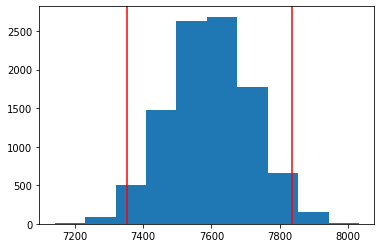

In [7]:
plt.hist(list3)
plt.axvline(percentile3[0],color='r')
plt.axvline(percentile3[1],color='r')

<ul>
<li>N0=the std of two samples are equal </li>
<li>Na=the std of two samples are not equal </li>
<li>we should reject null hypothesis because 0 is not include in the confidence interval.</li>
</ul>


__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

<ul>
    <li>H0= charges of people with no insurance >= charges of people with insurance </li>
    <li>Ha= charges of people with no insurance < charges of people with insurance</li>
<li>test statistic = mean of people have no insurance - mean of people have insurance</li>
</ul>

In [10]:
list4=[]
for i in range(10000):
    first=np.random.choice(insured['charges'],10000)
    second=np.random.choice(not_insured['charges'],10000)
    mean1=np.mean(first)
    mean2=np.mean(second)
    list4.append((mean2-mean1))
observed_t_stat= np.mean(not_insured['charges'])-np.mean(insured['charges'])
list5=[]
for i in list4:
     if (i>=observed_t_stat)==True:
            list5.append(1)
p_value=np.sum(list5)/10000
p_value

0.5053

Since the p-value is 0.509 which is greater than significance level 0.05, we fail to reject null hypothesis.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

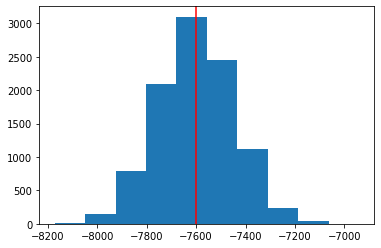

In [12]:
plt.hist(list4)
plt.axvline(observed_t_stat,color='r')


Another line could be plotted and it will be a mirror image of the above distribution but in positive numbers.

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

Yes. The p-value obtained from t-distribution is very close to 0 whereas in here, the p-value is 0.509. I think we need more random replicates. 

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

Answer: We should use 2-sample t test because we are testing between two groups.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

<ul>
<li>H0= click-through rate of B> click-through rate of A </li>
<li>HA= click-through rate of B<= click-through rate of A </li>
</ul>

If we reject null hypothesis, then we should keep the current version since it produces more click-through or redesign B and test its efficacy against A again.